# Pipelines


In [1]:
import numpy as np
import plotsandgraphs as pandg

# reload modules
%load_ext autoreload
%autoreload 2


## 1. Binary classification pipeline


Binary classifier metrics:  33%|███▎      | 2/6 [2:00:33<4:01:06, 3616.59s/it]
Binary classifier metrics: 7it [04:11, 35.86s/it]
Binary classifier metrics: 7it [00:13,  1.96s/it]


tests\test_results\tttt\roc_curve.png


tests\test_results\tttt\pr_curve.png
tests\test_results\tttt\calibration_curve.png



C:\Users\joshu\LRZ_Sync_Share\Joshua\Programming\plots_and_graphs\plotsandgraphs\binary_classifier.py:89: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = ax.figure.colorbar(
C:\Users\joshu\LRZ_Sync_Share\Joshua\Programming\plots_and_graphs\plotsandgraphs\binary_classifier.py:89: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = ax.figure.colorbar(


tests\test_results\tttt\confusion_matrix.png


tests\test_results\tttt\classification_report.png
tests\test_results\tttt\y_score_histogram.png


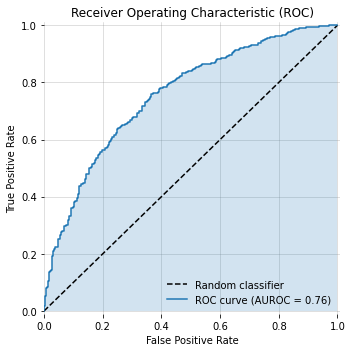

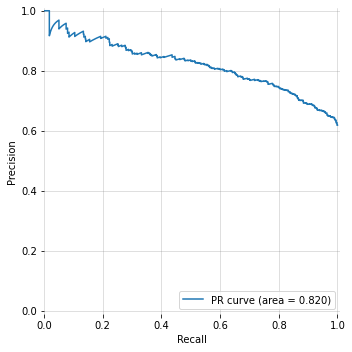

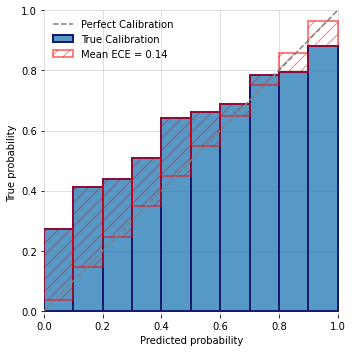

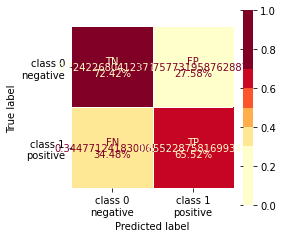

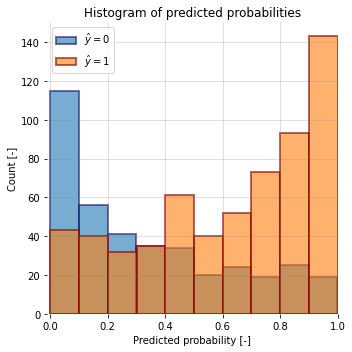

In [18]:
# create some data
n_samples = 1000
y_true = np.random.choice([0, 1], n_samples, p=[0.4, 0.6])  # the true class labels 0 or 1, with class imbalance 40:60

y_score = np.zeros(y_true.shape)  # a model's probability of class 1 predictions
y_score[y_true == 1] = np.random.beta(1, 0.6, y_score[y_true == 1].shape)
y_score[y_true == 0] = np.random.beta(0.5, 1, y_score[y_true == 0].shape)

save_fig_path = 'tests/test_results/tttt'
pandg.pipeline.binary_classifier(y_true, y_score, save_fig_path=save_fig_path)


# Multiclass Pipeline

In [8]:
num_classes = 3
class_labels = np.arange(num_classes)
class_probs = np.random.random(num_classes)
class_probs = class_probs / class_probs.sum() # normalize
# True labels
y_true = np.random.choice(class_labels, p=class_probs, size=1000)
# one hot encoding
y_true_one_hot = np.eye(num_classes)[y_true] 

# Predicted labels
y_pred = np.ones(y_true_one_hot.shape)

# parameters for Beta distribution for each label (a0,b0 for class 0, a1,b1 for class 1)
a0, b0 = [0.1, 0.6, 0.3, 0.4, 2]*10,  [0.4, 1.2, 0.8, 1, 5]*10
a1, b1 = [0.9, 0.8, 0.9, 1.2, 5]*10,  [0.4, 0.1, 0.5, 0.3, 2]*10

# iterate through all the columns/labels and create a beta distribution for each label
for i in range(y_pred.shape[1]):
    y = y_pred[:, i]
    y_t = y_true_one_hot[:, i]
    y[y_t==0] = np.random.beta(a0[i], b0[i], size=y[y_t==0].shape)
    y[y_t==1] = np.random.beta(a1[i], b1[i], size=y[y_t==1].shape)





Bootsrapping: 100%|██████████| 1/1 [00:00<00:00, 111.40it/s]



Bootsrapping: 100%|██████████| 1/1 [00:00<00:00, 250.65it/s]



Bootsrapping: 100%|██████████| 1/1 [00:00<00:00, 200.49it/s]

ROC for Class: 100%|██████████| 3/3 [00:00<00:00, 28.65it/s]

Bootsrapping: 100%|██████████| 1/1 [00:00<00:00, 75.38it/s]
Binary classifier metrics: 7it [1:36:55, 830.83s/it]
Binary classifier metrics:  50%|█████     | 3/6 [1:22:20<1:22:20, 1646.67s/it]


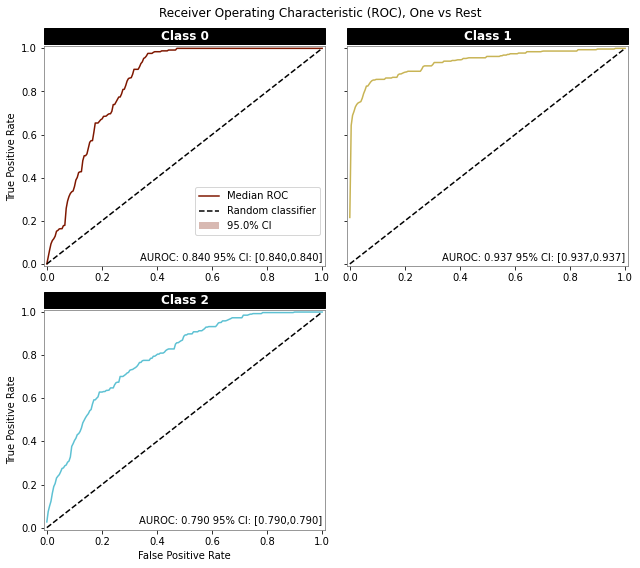

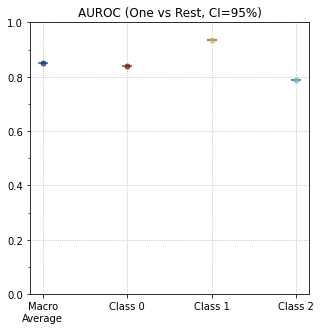

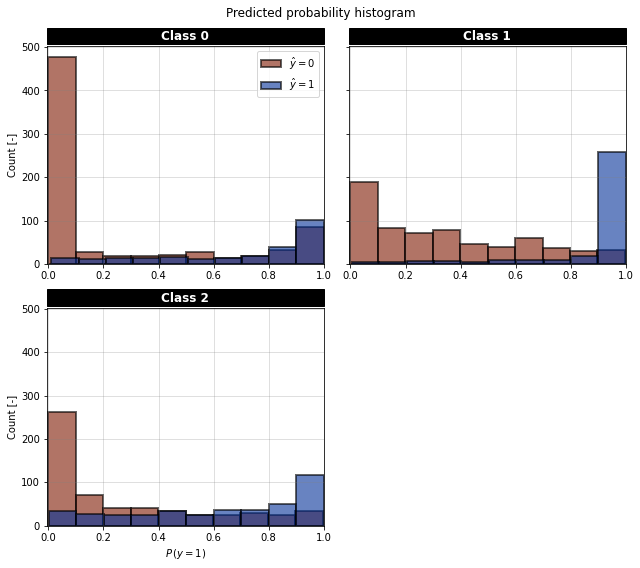

In [10]:
pandg.pipeline.multiclass_classifier(y_true_one_hot, y_pred)